## GATConv  - Parallel

In [1]:
import os
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
import sys
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from scipy.fftpack import fft, ifft
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [2]:
# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
sys.path.append('/mnt/e/eVTOL_model/eVTOL-VehicleModel/src')


# Import necessary functions
from utility_functions import downsample_to_35
from utility_functions import organize_data

# Import all the models
from af_escnn_cl import ESCNN_Cl
from af_escnn_cd import ESCNN_Cd

from af_rbf_cl import RBFLayer_cl, RBFNet_cl
from af_rbf_cd import RBFLayer_cd, RBFNet_cd

## Load Rotor Data

In [4]:
from create_rotor_dataset import PropellerDataset, subdir_condition_rotor

# Root directory where simulation subdirectories are stored
# root_dir_rotor = '/mnt/e/Course_Materials/ROM/rotor_solver/FLOWUnsteady_simulations/train_data'
root_dir_rotor = '/mnt/e/eVTOL_model/eVTOL-VehicleModel/FLOWUnsteady_simulations/aircraft_data/training_data'

# dataset - Rotor L1
dataset_rotor_L1 = PropellerDataset(root_dir_rotor,
                           rotor_notation = 'L1',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                           subdir_condition=subdir_condition_rotor)
inputs_rL1, outputs_rL1 = dataset_rotor_L1[0:]


input_tensor_rL1 = inputs_rL1.squeeze(1)  # Reshaping
print("Input shape (rotor - L1):", input_tensor_rL1.shape) 

output_tensor_rL1 = outputs_rL1.squeeze(1)
print("Output shape (rotor - L1):",output_tensor_rL1.shape) 


# dataset - Rotor L2
dataset_rotor_L2 = PropellerDataset(root_dir_rotor,
                           rotor_notation = 'L2',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                           subdir_condition=subdir_condition_rotor)
inputs_rL2, outputs_rL2 = dataset_rotor_L2[0:]


input_tensor_rL2 = inputs_rL2.squeeze(1)  # Reshaping
print("Input shape (rotor - L2):", input_tensor_rL2.shape) 

output_tensor_rL2 = outputs_rL2.squeeze(1)
print("Output shape (rotor - L2):",output_tensor_rL2.shape) 

# dataset - Rotor L3
dataset_rotor_L3 = PropellerDataset(root_dir_rotor,
                           rotor_notation = 'L3',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                           subdir_condition=subdir_condition_rotor)
inputs_rL3, outputs_rL3 = dataset_rotor_L3[0:]


input_tensor_rL3 = inputs_rL3.squeeze(1)  # Reshaping
print("Input shape (rotor - L3):", input_tensor_rL3.shape) 

output_tensor_rL3 = outputs_rL3.squeeze(1)
print("Output shape (rotor - L3):",output_tensor_rL3.shape) 

# dataset - Rotor L4
dataset_rotor_L4 = PropellerDataset(root_dir_rotor,
                           rotor_notation = 'L4',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                           subdir_condition=subdir_condition_rotor)
inputs_rL4, outputs_rL4 = dataset_rotor_L4[0:]


input_tensor_rL4 = inputs_rL4.squeeze(1)  # Reshaping
print("Input shape (rotor - L4):", input_tensor_rL4.shape) 

output_tensor_rL4 = outputs_rL4.squeeze(1)
print("Output shape (rotor - L4):",output_tensor_rL4.shape) 

/mnt/e/eVTOL_model/eVTOL-VehicleModel/src/create_rotor_dataset.py:146: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(inputs, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32)


Input shape (rotor - L1): torch.Size([39, 280, 10])
Output shape (rotor - L1): torch.Size([39, 280, 2])
Input shape (rotor - L2): torch.Size([39, 280, 10])
Output shape (rotor - L2): torch.Size([39, 280, 2])
Input shape (rotor - L3): torch.Size([39, 280, 10])
Output shape (rotor - L3): torch.Size([39, 280, 2])
Input shape (rotor - L4): torch.Size([39, 280, 10])
Output shape (rotor - L4): torch.Size([39, 280, 2])


In [5]:
# dataset - Rotor R1
dataset_rotor_R1 = PropellerDataset(root_dir_rotor,
                           rotor_notation = 'R1',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                           subdir_condition=subdir_condition_rotor)
inputs_rR1, outputs_rR1 = dataset_rotor_R1[0:]


input_tensor_rR1 = inputs_rR1.squeeze(1)  # Reshaping
print("Input shape (rotor - R1):", input_tensor_rR1.shape) 

output_tensor_rR1 = outputs_rR1.squeeze(1)
print("Output shape (rotor - R1):",output_tensor_rR1.shape) 


# dataset - Rotor R2
dataset_rotor_R2 = PropellerDataset(root_dir_rotor,
                           rotor_notation = 'R2',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                           subdir_condition=subdir_condition_rotor)
inputs_rR2, outputs_rR2 = dataset_rotor_R2[0:]


input_tensor_rR2 = inputs_rR2.squeeze(1)  # Reshaping
print("Input shape (rotor - R2):", input_tensor_rR2.shape) 

output_tensor_rR2 = outputs_rR2.squeeze(1)
print("Output shape (rotor - R2):",output_tensor_rR2.shape) 

# dataset - Rotor R3
dataset_rotor_R3 = PropellerDataset(root_dir_rotor,
                           rotor_notation = 'R3',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                           subdir_condition=subdir_condition_rotor)
inputs_rR3, outputs_rR3 = dataset_rotor_R3[0:]


input_tensor_rR3 = inputs_rR3.squeeze(1)  # Reshaping
print("Input shape (rotor - R3):", input_tensor_rR3.shape) 

output_tensor_rR3 = outputs_rR3.squeeze(1)
print("Output shape (rotor - R3):",output_tensor_rR3.shape) 

# dataset - Rotor R4
dataset_rotor_R4 = PropellerDataset(root_dir_rotor,
                           rotor_notation = 'R4',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                           subdir_condition=subdir_condition_rotor)
inputs_rR4, outputs_rR4 = dataset_rotor_R4[0:]


input_tensor_rR4 = inputs_rR4.squeeze(1)  # Reshaping
print("Input shape (rotor - R4):", input_tensor_rR4.shape) 

output_tensor_rR4 = outputs_rR4.squeeze(1)
print("Output shape (rotor - R4):",output_tensor_rR4.shape) 

Input shape (rotor - R1): torch.Size([39, 280, 10])
Output shape (rotor - R1): torch.Size([39, 280, 2])
Input shape (rotor - R2): torch.Size([39, 280, 10])
Output shape (rotor - R2): torch.Size([39, 280, 2])
Input shape (rotor - R3): torch.Size([39, 280, 10])
Output shape (rotor - R3): torch.Size([39, 280, 2])
Input shape (rotor - R4): torch.Size([39, 280, 10])
Output shape (rotor - R4): torch.Size([39, 280, 2])


In [6]:
# input_tensor_all_rotors = torch.cat((input_tensor_rL1, input_tensor_rR2, input_tensor_rL3, input_tensor_rL4), dim=0) 
#                                         # input_tensor_rR1, input_tensor_rR2, input_tensor_rR3, input_tensor_rR4), dim=0)

# output_tensor_all_rotors = torch.cat((output_tensor_rL1, output_tensor_rL2, output_tensor_rL3, output_tensor_rL4), dim=0)
#                                         # output_tensor_rR1, output_tensor_rR2, output_tensor_rR3, output_tensor_rR4), dim=0)

input_tensor_all_rotors = torch.cat((input_tensor_rL2, input_tensor_rR2), dim=0) 
                                        # input_tensor_rR1, input_tensor_rR2, input_tensor_rR3, input_tensor_rR4), dim=0)

output_tensor_all_rotors = torch.cat((output_tensor_rL2, output_tensor_rR2), dim=0)
                                        # output_tensor_rR1, output_tensor_rR2, output_tensor_rR3, output_tensor_rR4), dim=0)

print("Input shape (all rotors):", input_tensor_all_rotors.shape)
print("Output shape (all rotors):", output_tensor_all_rotors.shape)

Input shape (all rotors): torch.Size([78, 280, 10])
Output shape (all rotors): torch.Size([78, 280, 2])


## Load Rotor Model and Initialize

In [7]:
from rotor_model import LSTMNet_rotor

input_size_rotor = 10
hidden_size_rotor = 100
output_size_rotor = 2
num_layers_rotor = 4

class PropModel(LSTMNet_rotor):
    def __init__(self):
        super(PropModel, self).__init__(input_size_rotor, hidden_size_rotor, 
                                        output_size_rotor, num_layers_rotor)

root_rotorModelsTrained = '/mnt/e/eVTOL_model/eVTOL-VehicleModel/trained_models/models/rotor/'
root_rotorScalersTrained = '/mnt/e/eVTOL_model/eVTOL-VehicleModel/trained_models/scalers/rotor/'

# Initialize the model
prop_model = PropModel()
# prop_model.load_state_dict(torch.load(root_rotorModelsTrained+'2024-10-04_propModel_lr0.005_e1500_nL2_numNN50.pth'))
prop_model.load_state_dict(torch.load(root_rotorModelsTrained+'2025-01-30_modified_H26FpropModel_lr0.001_e2500_nL4_numNN100.pth'))
prop_model = prop_model.to(device)
# prop_model.eval()

# Load the scaler
# input_scaler_rotor = joblib.load(root_rotorScalersTrained+'2024-10-04_ipScaler_lr0.005_e1500_nL2_numNN50.pkl')
# output_scaler_rotor = joblib.load(root_rotorScalersTrained+'2024-10-04_opScaler_lr0.005_e1500_nL2_numNN50.pkl')


input_scaler_rotor = joblib.load(root_rotorScalersTrained+'2025-01-30_modified_H26F_ipScaler_lr0.001_e2500_nL4_numNN100.pkl')
output_scaler_rotor = joblib.load(root_rotorScalersTrained+'2025-01-30_modified_H26F_opScaler_lr0.001_e2500_nL4_numNN100.pkl')

/tmp/ipykernel_426361/4223256728.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  prop_model.load_state_dict(torch.load(root_rotorModelsTrained+'2025-01-30_modified_H26F

In [8]:
# Reshape data for scaling (flatten along the time dimension)
input_scaler_rotorL1 = MinMaxScaler()
output_scaler_rotorL1 = MinMaxScaler()

inputs_reshaped = input_tensor_all_rotors.reshape(-1, input_size_rotor)
outputs_reshaped = output_tensor_all_rotors.reshape(-1, output_size_rotor)

# Fit and transform inputs and outputs
inputs_all_rotors_normalized = input_scaler_rotorL1.fit_transform(inputs_reshaped).reshape(input_tensor_all_rotors.shape)
outputs_all_rotors_normalized = output_scaler_rotorL1.fit_transform(outputs_reshaped).reshape(output_tensor_all_rotors.shape)

print("Normalized input shape:", inputs_all_rotors_normalized.shape)
print("Normalized output shape:", outputs_all_rotors_normalized.shape)

Normalized input shape: (78, 280, 10)
Normalized output shape: (78, 280, 2)


In [9]:
# Creates training and validation datasets
class SimulationDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return torch.tensor(self.inputs[idx], dtype=torch.float32), torch.tensor(self.outputs[idx], dtype=torch.float32)

In [10]:
# Constants
EPOCHS = 2500
BATCH_SIZE = 2
LEARNING_RATE = 2e-4

In [11]:
val_percentage = 0.3   # Percentage of data to be used for testing

train_dataset_num = len(input_tensor_all_rotors) - int(len(input_tensor_all_rotors)*val_percentage)    
print("Number of datasets to be used for training:", train_dataset_num)
print("Number of datasets to be used for evaluation:", len(input_tensor_all_rotors) - train_dataset_num)

# Create the normalized dataset using the custom Dataset class
train_dataset = SimulationDataset(inputs_all_rotors_normalized[:train_dataset_num], outputs_all_rotors_normalized[:train_dataset_num])    # First 70% for training
val_dataset = SimulationDataset(inputs_all_rotors_normalized[train_dataset_num:], outputs_all_rotors_normalized[train_dataset_num:])      # Remaining for evaluation

# Create DataLoaders
trainDataLoader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)    # Shuffle training data
valDataLoader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)        # Shuffle validation data


Number of datasets to be used for training: 55
Number of datasets to be used for evaluation: 23


In [12]:

# Ensure all parameters are trainable (for fine-tuning)
rotor_L1_model = prop_model
rotor_L1_model = rotor_L1_model.to(device)
for param in rotor_L1_model.parameters():
    param.requires_grad = True


In [13]:
# def custom_loss(pred, target):
#     pred_fft = torch.fft.fft(pred)
#     target_fft = torch.fft.fft(target)

#     fft_loss = torch.mean((torch.abs(pred_fft) - torch.abs(target_fft)) ** 2)

#     return fft_loss

In [14]:
def custom_loss(pred, target):
    return torch.mean((pred - target) ** 2) + 0.8 * torch.mean(torch.abs(pred - target))


In [15]:
# def amplitude_loss(pred, target):
#     scale_factor = torch.abs(target).mean()  # Capture expected amplitude
#     return torch.mean(((pred - target) / scale_factor) ** 2)  # Normalize amplitude errors

In [16]:
# criterion = nn.MSELoss()
criterion = custom_loss
optimizer_fine_tune_rotor = torch.optim.AdamW(rotor_L1_model.parameters(), lr=LEARNING_RATE)

In [17]:
train_losses = []
eval_losses = []

print("[INFO] training the network...")

# Training loop
for epoch in range(EPOCHS):
    rotor_L1_model.train()
    running_loss = 0.0
    
    for inputs, targets in trainDataLoader:
        inputs, targets = inputs.squeeze(1).to(device), targets.squeeze(1).to(device)

        # Forward pass
        outputs = rotor_L1_model(inputs)
        
        loss = criterion(outputs, targets)
        # Backward pass and optimization
        optimizer_fine_tune_rotor.zero_grad()
        loss.backward()
        optimizer_fine_tune_rotor.step()
        
        running_loss += loss.item()

    avg_train_loss = running_loss / len(trainDataLoader)
    train_losses.append(avg_train_loss)


    # Evaluation Loop
    rotor_L1_model.eval()
    eval_loss = 0.0

    with torch.no_grad():
        for inputs, targets in valDataLoader:
            inputs, targets = inputs.squeeze(1).to(device), targets.squeeze(1).to(device)
            
            # Forward pass
            outputs = rotor_L1_model(inputs)
            # outputs, attention_weights = model(inputs)

            loss = criterion(outputs, targets)
            eval_loss += loss.item()

        avg_eval_loss = eval_loss / len(valDataLoader)
        eval_losses.append(avg_eval_loss)
    
    print(f'Epoch [{epoch+1}/{EPOCHS}],\n Training Loss: {running_loss/len(trainDataLoader):.8f}')
    print(f'Evaluation Loss: {eval_loss/len(valDataLoader):.8f}')


print("[INFO] Finished training the network...")

[INFO] training the network...
Epoch [1/2500],
 Training Loss: 0.18160539
Evaluation Loss: 0.12187635
Epoch [2/2500],
 Training Loss: 0.16816009
Evaluation Loss: 0.11022942
Epoch [3/2500],
 Training Loss: 0.15508156
Evaluation Loss: 0.10225362
Epoch [4/2500],
 Training Loss: 0.14450497
Evaluation Loss: 0.09656117
Epoch [5/2500],
 Training Loss: 0.13678116
Evaluation Loss: 0.08933751
Epoch [6/2500],
 Training Loss: 0.13586480
Evaluation Loss: 0.08382786
Epoch [7/2500],
 Training Loss: 0.12492748
Evaluation Loss: 0.08224314
Epoch [8/2500],
 Training Loss: 0.12130179
Evaluation Loss: 0.07801912
Epoch [9/2500],
 Training Loss: 0.11384479
Evaluation Loss: 0.07418364
Epoch [10/2500],
 Training Loss: 0.11060922
Evaluation Loss: 0.06772858
Epoch [11/2500],
 Training Loss: 0.10518264
Evaluation Loss: 0.06750930
Epoch [12/2500],
 Training Loss: 0.10335101
Evaluation Loss: 0.06661340
Epoch [13/2500],
 Training Loss: 0.10215702
Evaluation Loss: 0.06996732
Epoch [14/2500],
 Training Loss: 0.1018643

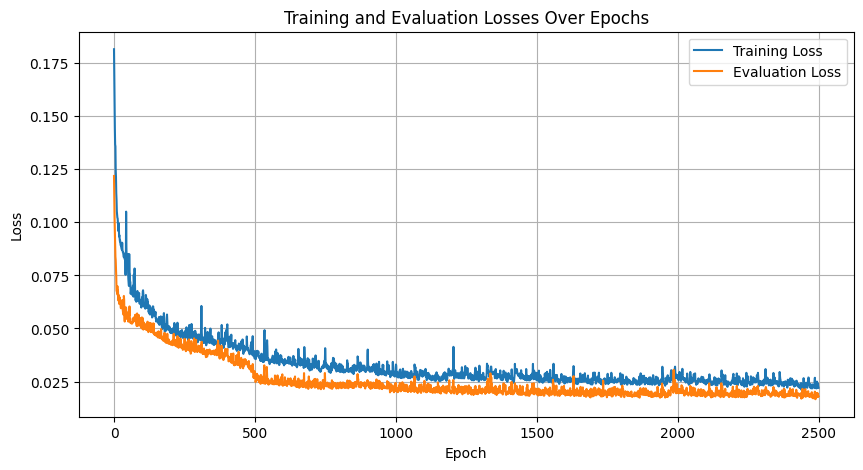

In [18]:
# Plotting the training and evaluation losses
plt.figure(figsize=(10, 5))
plt.plot((train_losses), label='Training Loss')
plt.plot((eval_losses), label='Evaluation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Losses Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import datetime
date = datetime.date.today()

In [23]:
import datetime
date = datetime.date.today()

save_path =  '/mnt/e/eVTOL_model/eVTOL-VehicleModel/trained_models/models/rotor/{}_H26FpropModel_rotor2_lr{}_e{}_nL{}_numNN{}.pth'.format(date, LEARNING_RATE, EPOCHS, num_layers_rotor, hidden_size_rotor)
print("The model will be saved as the following:\n {}".format(save_path))


torch.save(prop_model.state_dict(), save_path)

The model will be saved as the following:
 /mnt/e/eVTOL_model/eVTOL-VehicleModel/trained_models/models/rotor/2025-02-05_H26FpropModel_rotor2_lr0.0002_e2500_nL4_numNN100.pth


In [24]:
joblib.dump(input_scaler_rotor, '/mnt/e/eVTOL_model/eVTOL-VehicleModel/trained_models/scalers/rotor/{}_H26F_rotor2_ipScaler_lr{}_e{}_nL{}_numNN{}.pkl'.format(date, LEARNING_RATE, EPOCHS, num_layers_rotor, hidden_size_rotor))
joblib.dump(output_scaler_rotor, '/mnt/e/eVTOL_model/eVTOL-VehicleModel/trained_models/scalers/rotor/{}_H26F_rotor2_opScaler_lr{}_e{}_nL{}_numNN{}.pkl'.format(date, LEARNING_RATE, EPOCHS, num_layers_rotor, hidden_size_rotor))

['/mnt/e/eVTOL_model/eVTOL-VehicleModel/trained_models/scalers/rotor/2025-02-05_H26F_rotor2_opScaler_lr0.0002_e2500_nL4_numNN100.pkl']

## Test the model

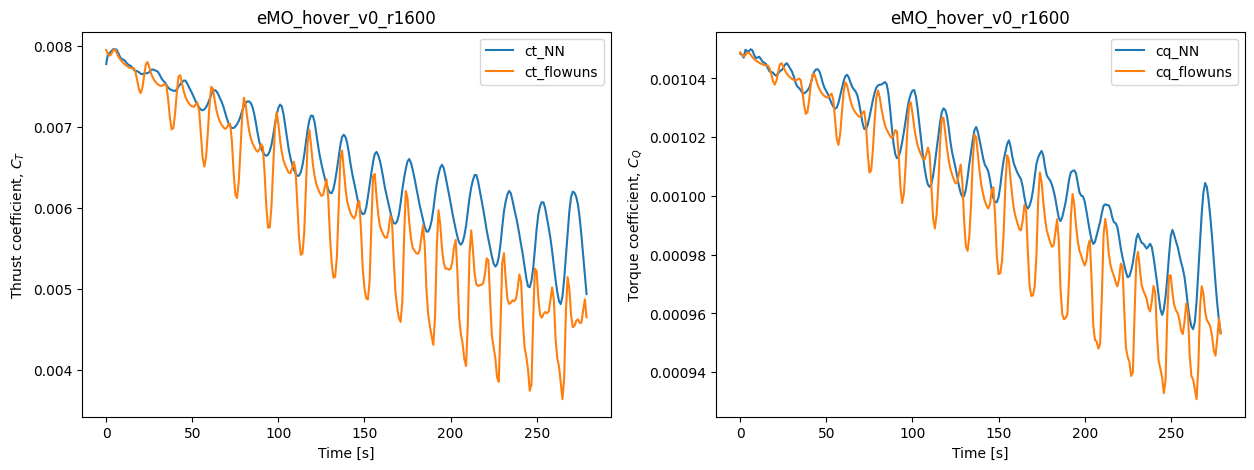

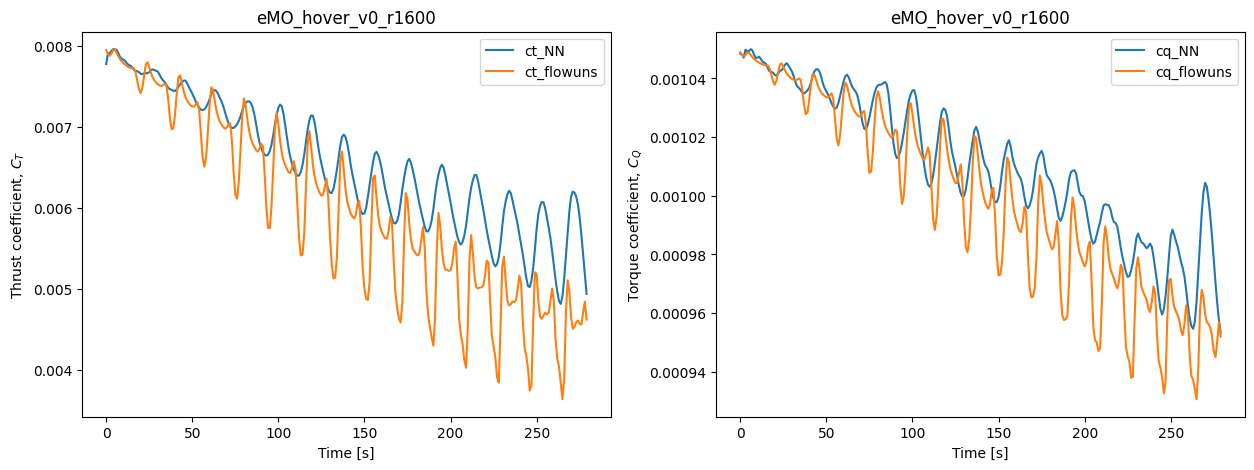

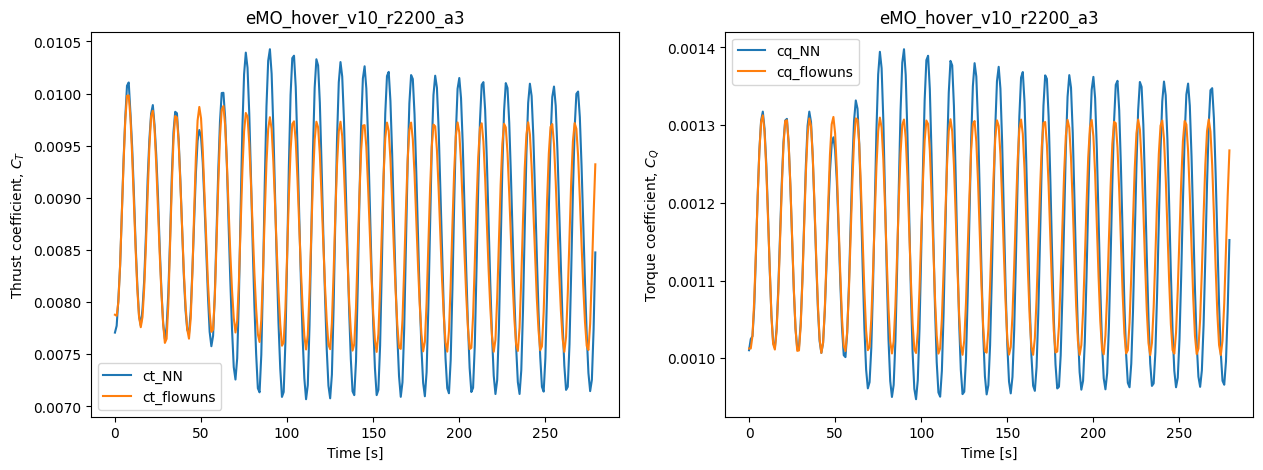

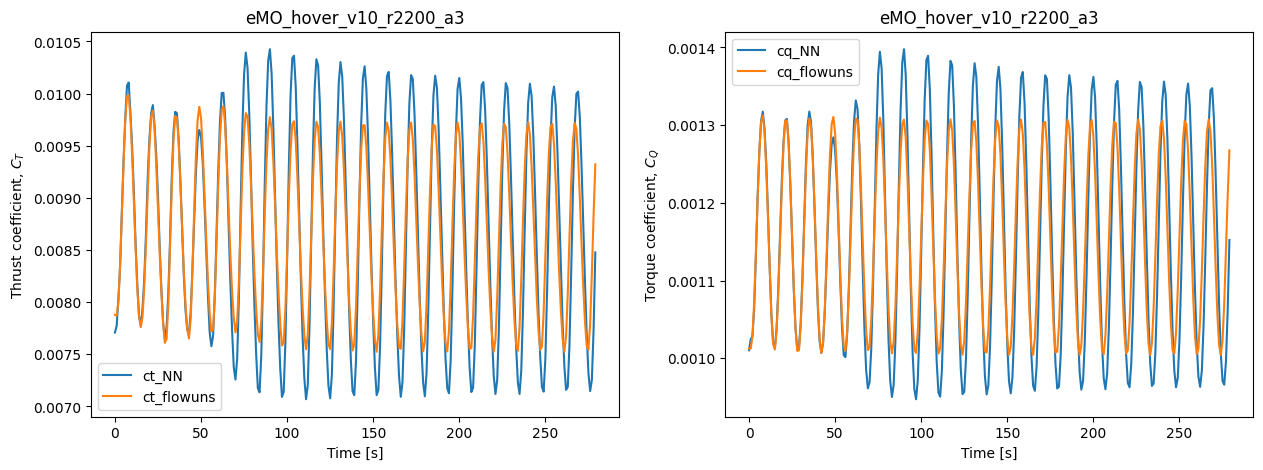

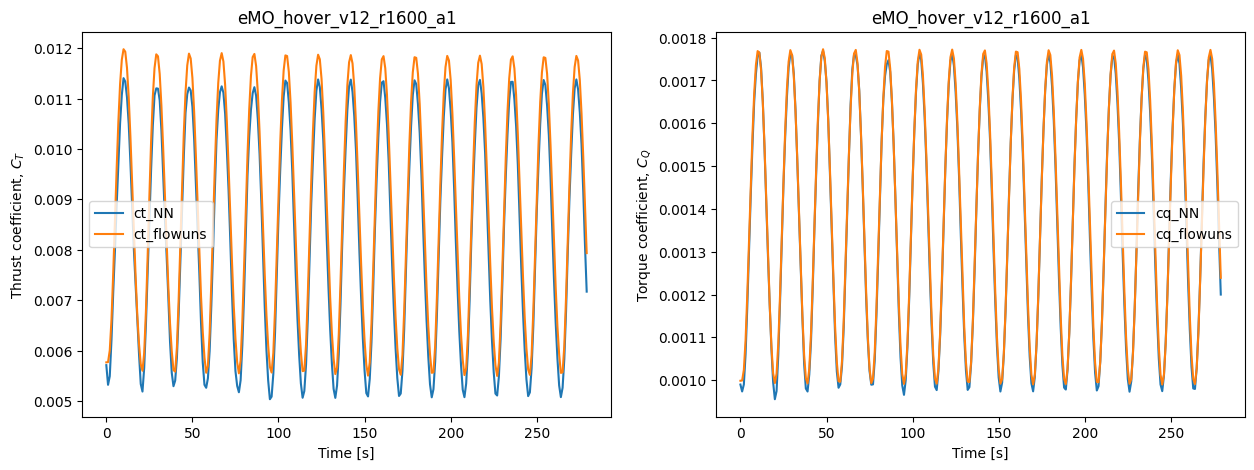

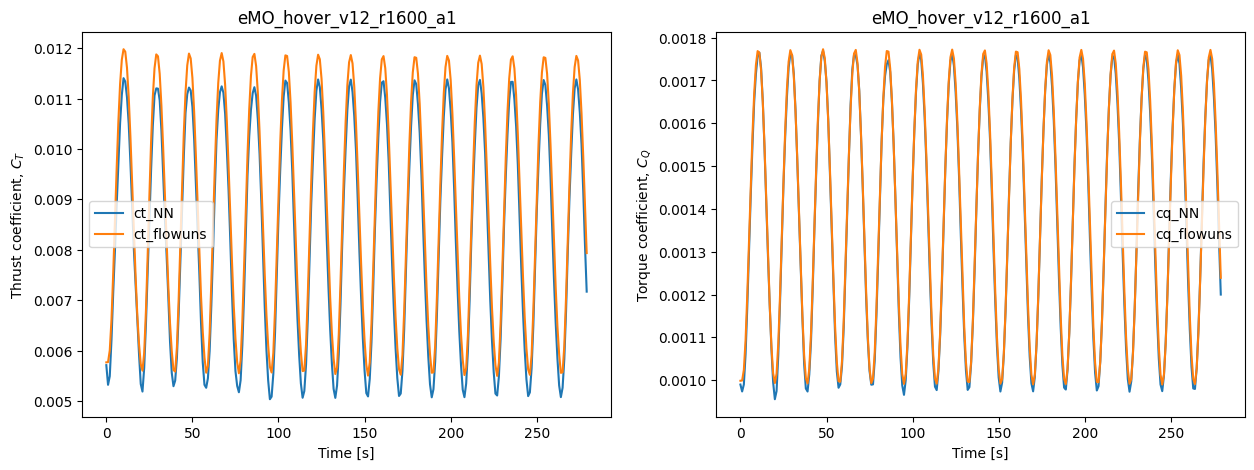

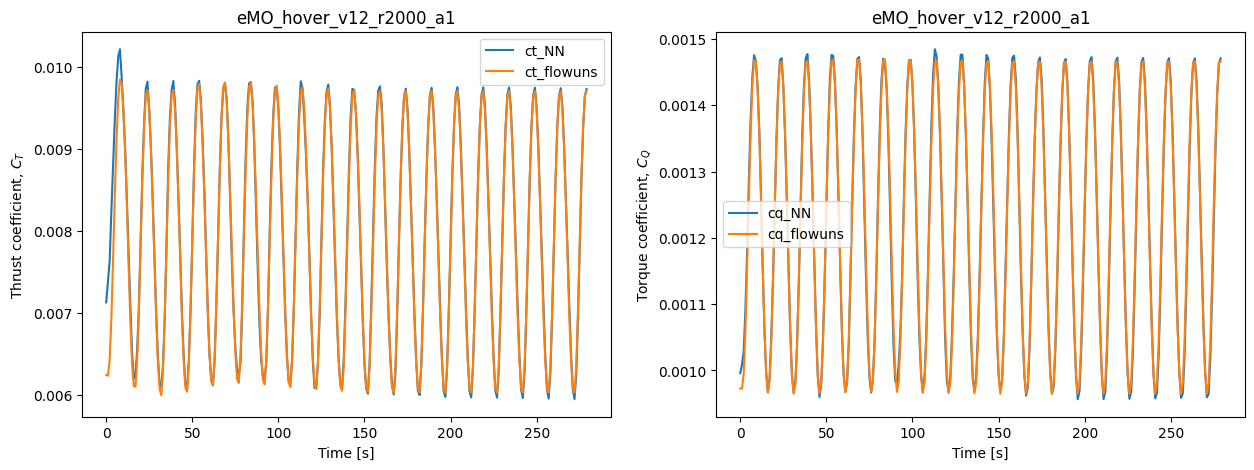

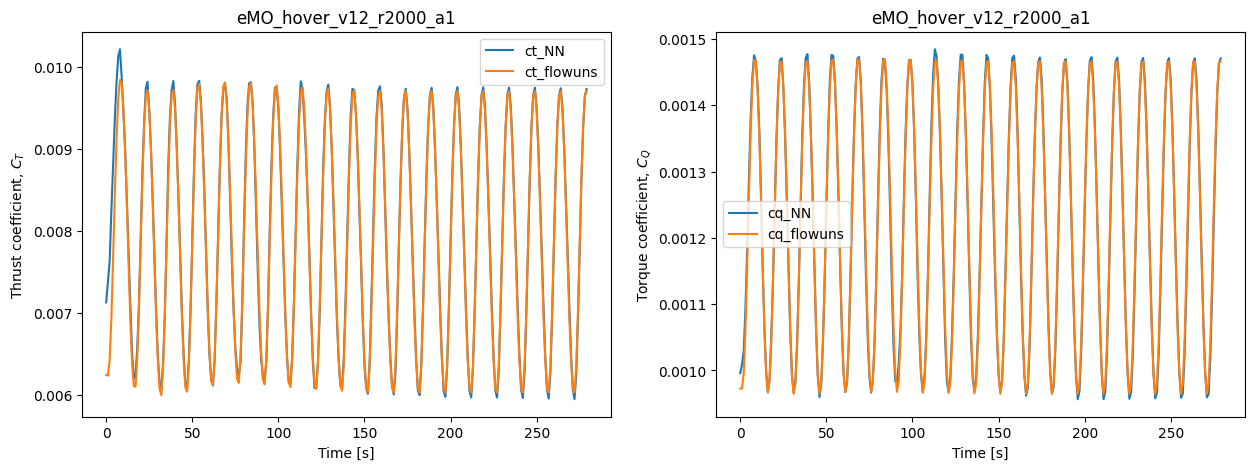

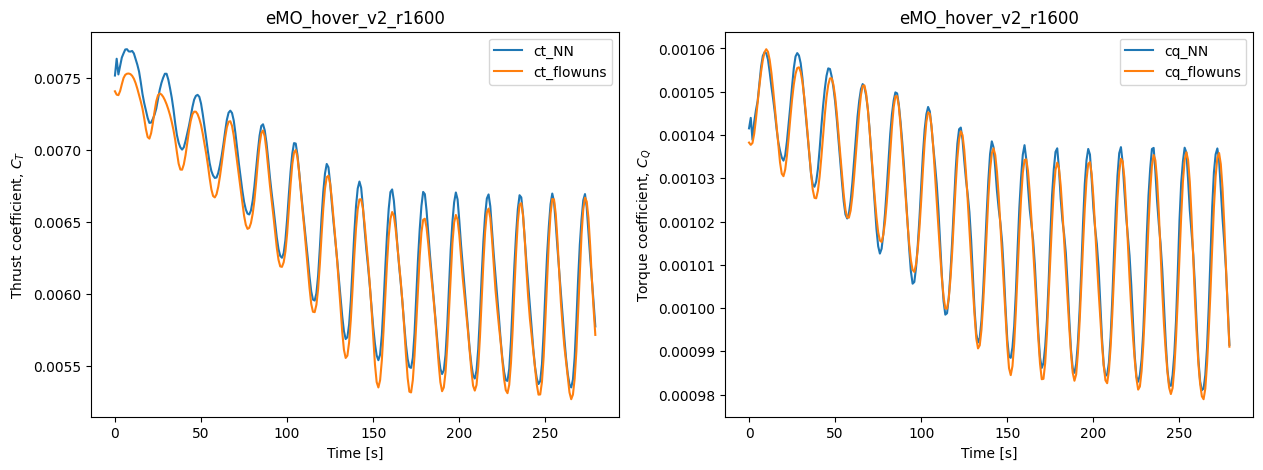

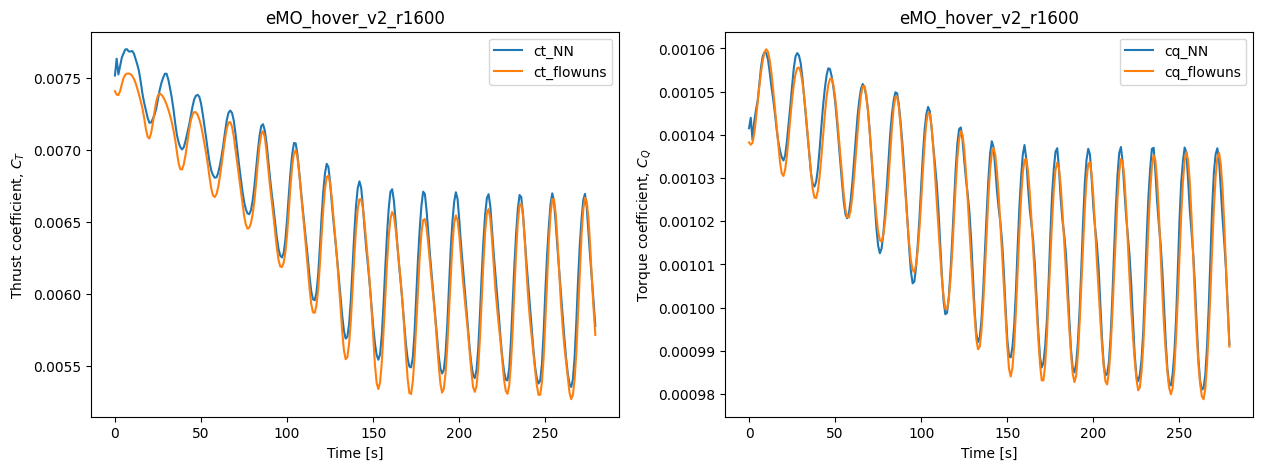

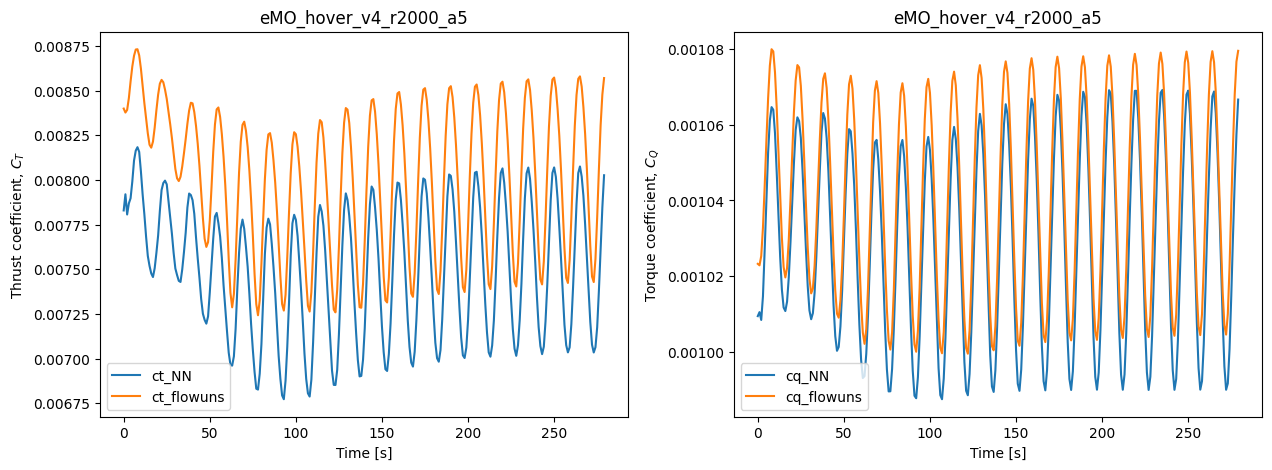

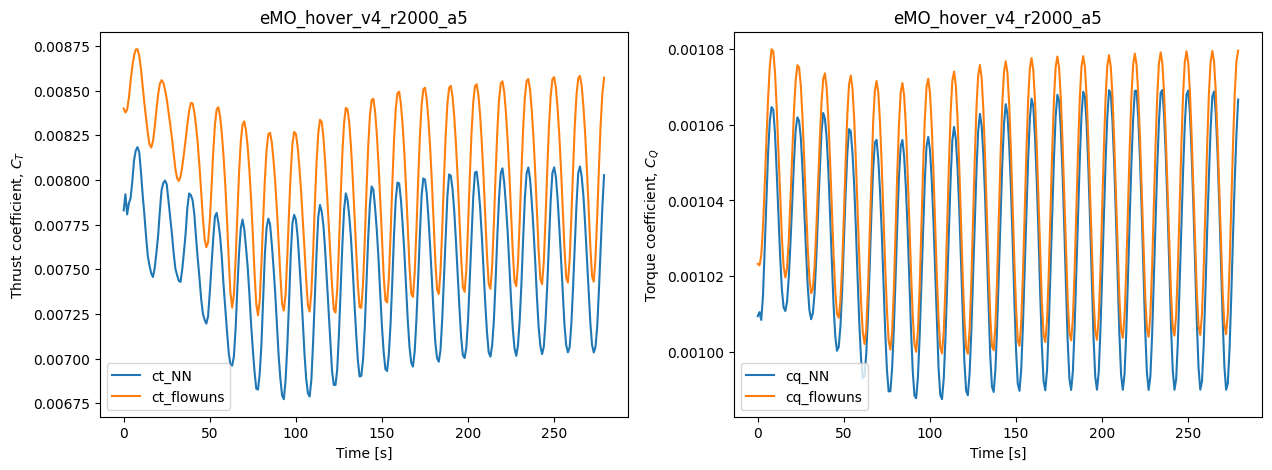

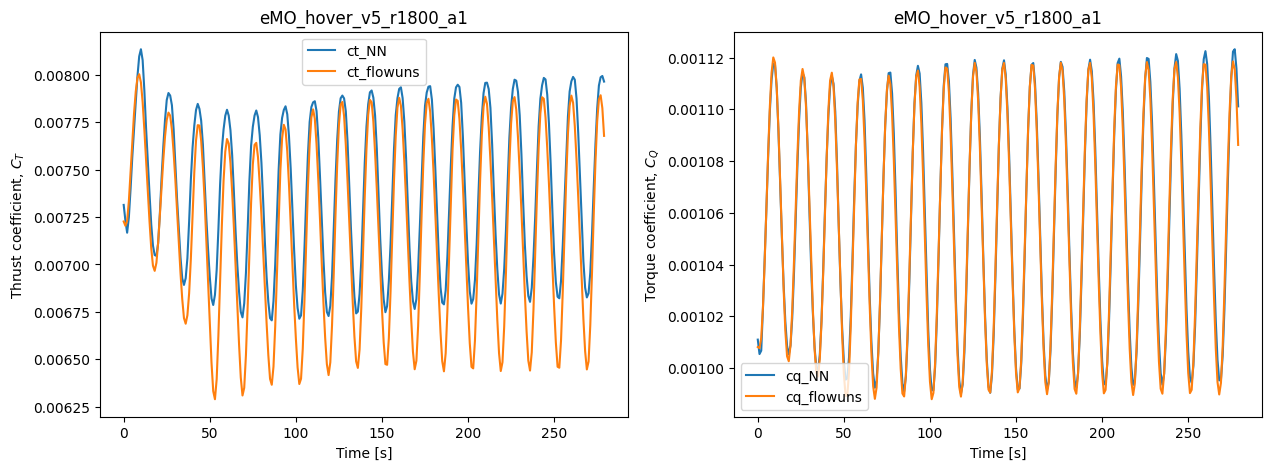

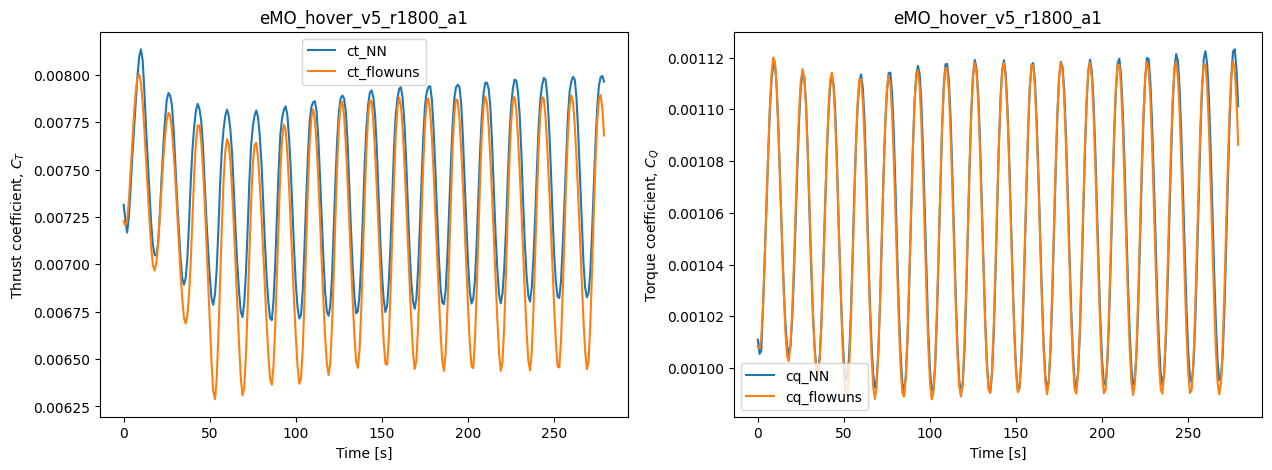

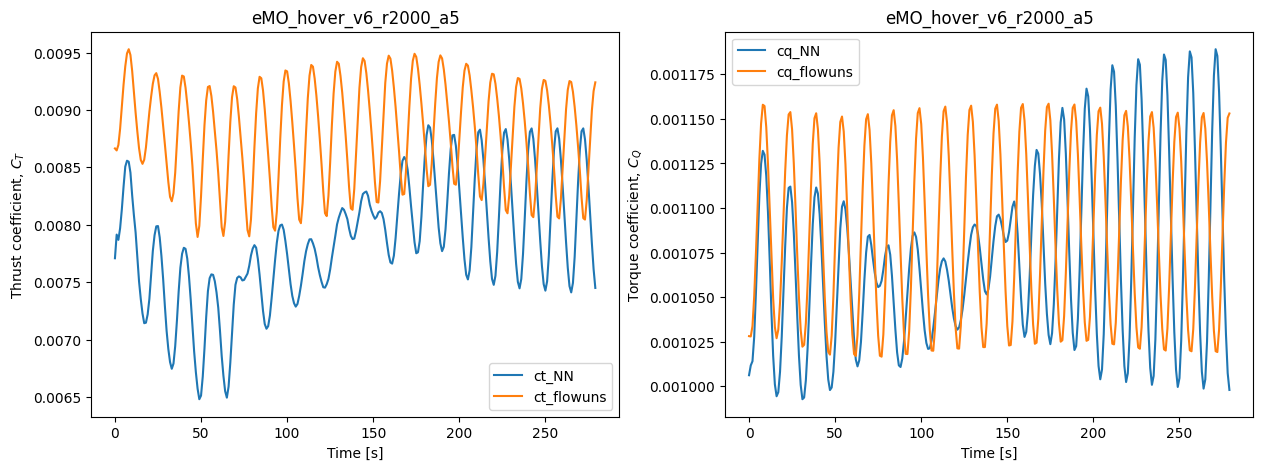

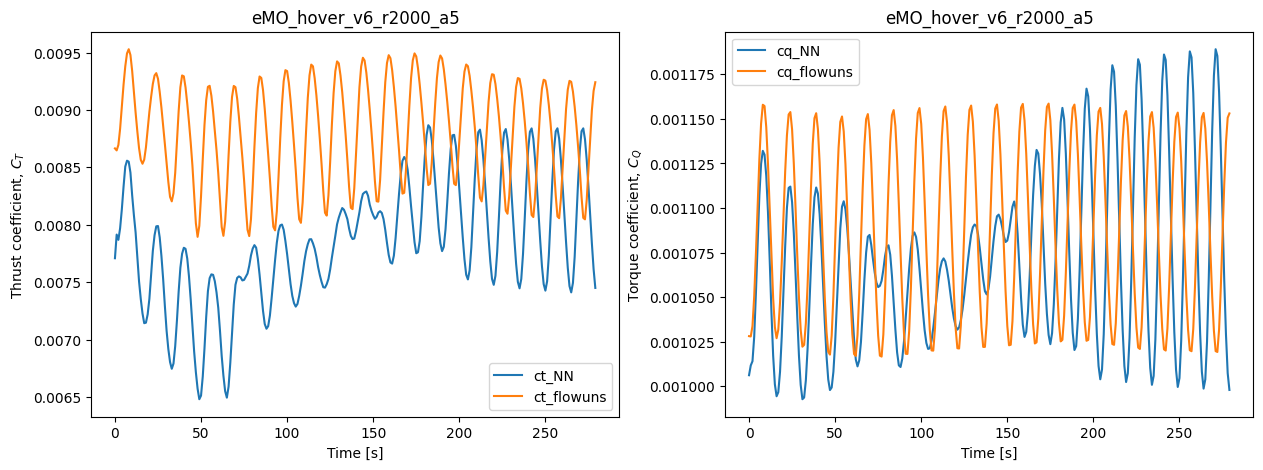

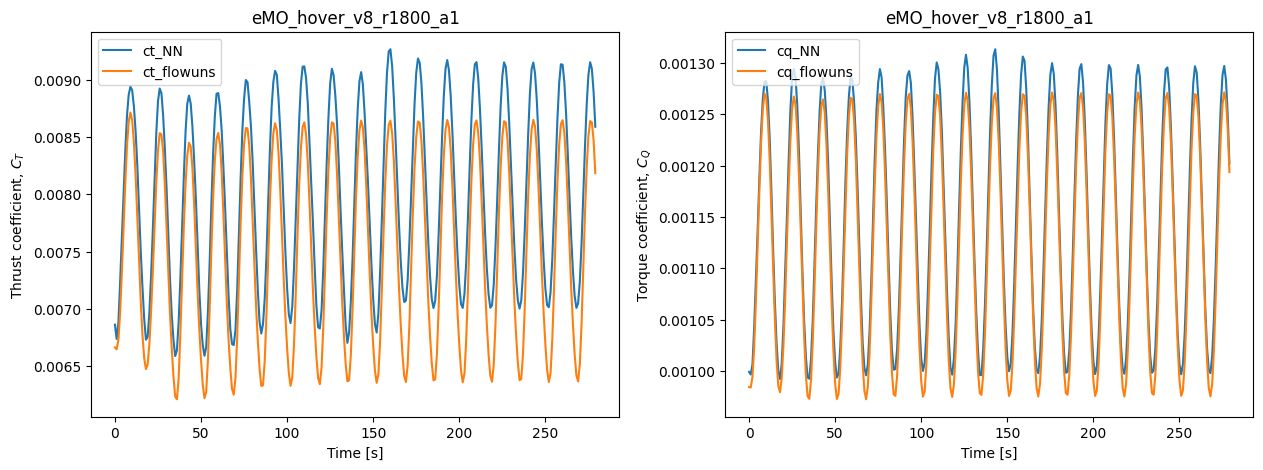

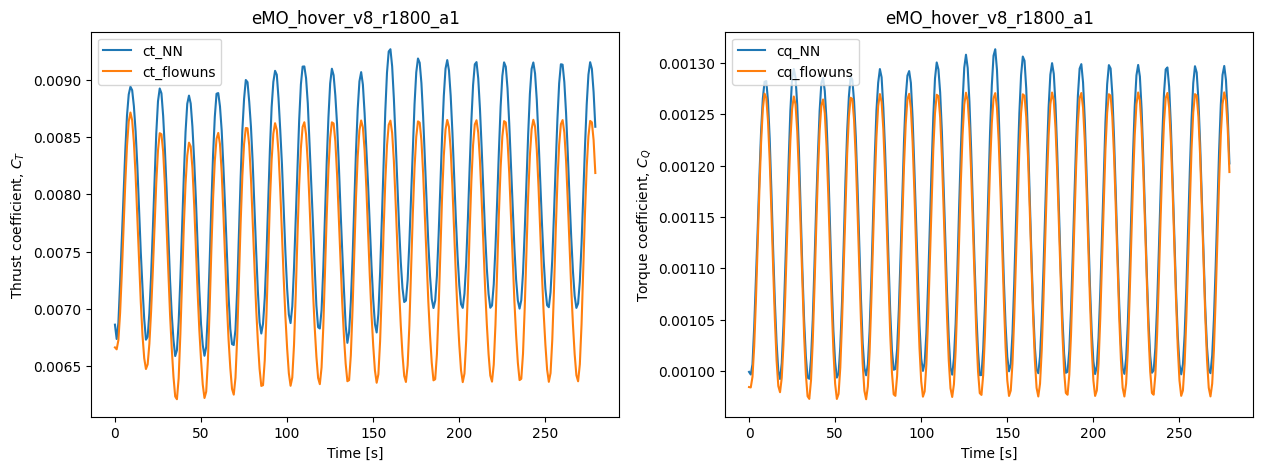

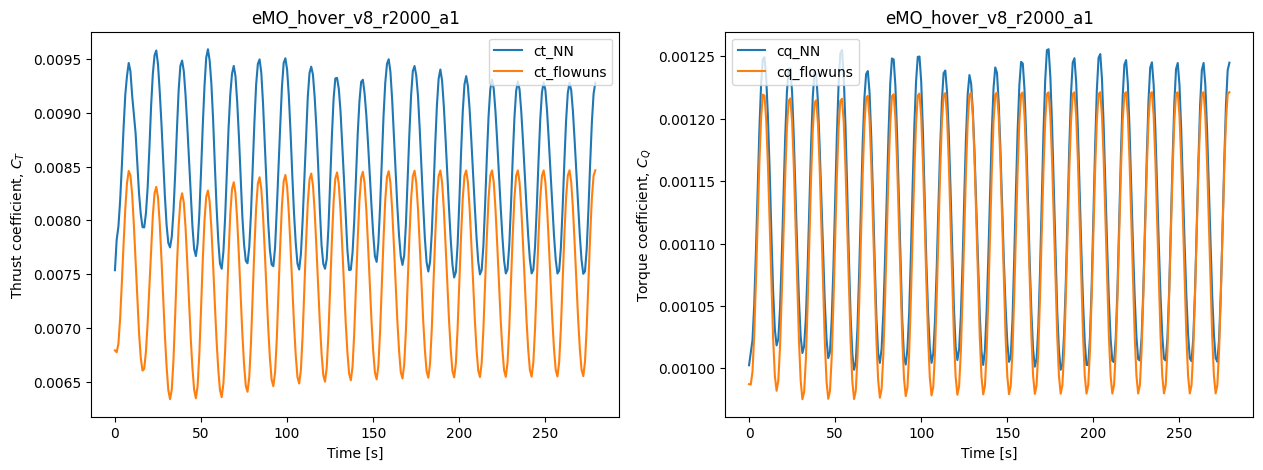

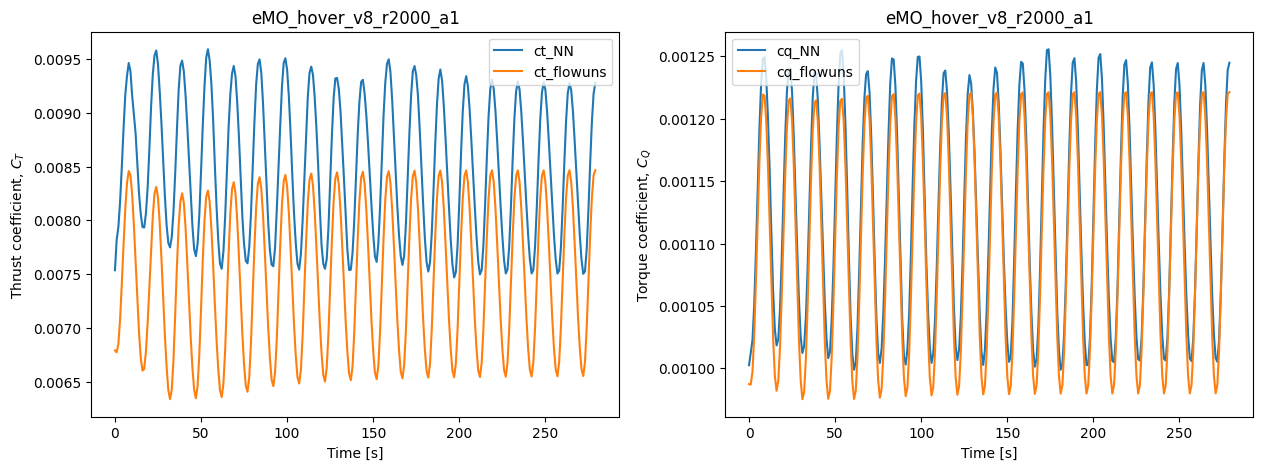

In [22]:
 
from sklearn.metrics import mean_squared_error 

root_test_base = '/mnt/e/eVTOL_model/eVTOL-VehicleModel/FLOWUnsteady_simulations/aircraft_data/testing_data/'
batch_size_test = 1

for simulation_case in os.listdir(root_test_base):

    root_test_dir = root_test_base+simulation_case


    # dataset - Rotor L1
    dataset_rotor_L1_test = PropellerDataset(root_test_dir,
                            rotor_notation = 'L1',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                            subdir_condition=subdir_condition_rotor)
    inputs_rL1_test, outputs_rL1_test = dataset_rotor_L1_test[0:]

    input_tensor_rL1_test = inputs_rL1_test.squeeze(1)  # Reshaping
    # print("Input shape (rotor - L1):", input_tensor_rL1.shape) 
    output_tensor_rL1_test = outputs_rL1_test.squeeze(1)
    # print("Output shape (rotor - L1):",output_tensor_rL1.shape)

    dataset_rotor_L2_test = PropellerDataset(root_test_dir,
                            rotor_notation = 'L2',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                            subdir_condition=subdir_condition_rotor)
    inputs_rL2_test, outputs_rL2_test = dataset_rotor_L2_test[0:]
    
    input_tensor_rL2_test = inputs_rL2_test.squeeze(1)  # Reshaping
    output_tensor_rL2_test = outputs_rL2_test.squeeze(1)

    dataset_rotor_L3_test = PropellerDataset(root_test_dir,
                            rotor_notation = 'L3',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                            subdir_condition=subdir_condition_rotor)
    inputs_rL3_test, outputs_rL3_test = dataset_rotor_L3_test[0:]

    input_tensor_rL3_test = inputs_rL3_test.squeeze(1)  # Reshaping
    output_tensor_rL3_test = outputs_rL3_test.squeeze(1)

    dataset_rotor_L4_test = PropellerDataset(root_test_dir,
                            rotor_notation = 'L4',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                            subdir_condition=subdir_condition_rotor)
    inputs_rL4_test, outputs_rL4_test = dataset_rotor_L4_test[0:]

    input_tensor_rL4_test = inputs_rL4_test.squeeze(1)  # Reshaping
    output_tensor_rL4_test = outputs_rL4_test.squeeze(1)


    # dataset - Rotor R1
    dataset_rotor_R1_test = PropellerDataset(root_test_dir,
                            rotor_notation = 'R1',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                            subdir_condition=subdir_condition_rotor)
    inputs_rR1_test, outputs_rR1_test = dataset_rotor_R1_test[0:]

    input_tensor_rR1_test = inputs_rR1_test.squeeze(1)  # Reshaping
    # print("Input shape (rotor - R1):", input_tensor_rR1.shape) 
    output_tensor_rR1_test = outputs_rR1_test.squeeze(1)
    # print("Output shape (rotor - R1):",output_tensor_rR1.shape) 

    dataset_rotor_R2_test = PropellerDataset(root_test_dir,
                            rotor_notation = 'R2',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                            subdir_condition=subdir_condition_rotor)
    inputs_rR2_test, outputs_rR2_test = dataset_rotor_R2_test[0:]

    input_tensor_rR2_test = inputs_rR2_test.squeeze(1)  # Reshaping
    output_tensor_rR2_test = outputs_rR2_test.squeeze(1)

    dataset_rotor_R3_test = PropellerDataset(root_test_dir,
                            rotor_notation = 'R3',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                            subdir_condition=subdir_condition_rotor)
    inputs_rR3_test, outputs_rR3_test = dataset_rotor_R3_test[0:]

    input_tensor_rR3_test = inputs_rR3_test.squeeze(1)  # Reshaping
    output_tensor_rR3_test = outputs_rR3_test.squeeze(1)

    dataset_rotor_R4_test = PropellerDataset(root_test_dir,
                            rotor_notation = 'R4',                       # Select: L1, L2, L3, L4, R1, R2, R3, R4
                            subdir_condition=subdir_condition_rotor)
    inputs_rR4_test, outputs_rR4_test = dataset_rotor_R4_test[0:]

    input_tensor_rR4_test = inputs_rR4_test.squeeze(1)  # Reshaping
    output_tensor_rR4_test = outputs_rR4_test.squeeze(1)

    # input_tensor_all_rotors_test = torch.cat((input_tensor_rL1_test, input_tensor_rR1_test), dim=0)
    # output_tensor_all_rotors_test = torch.cat((output_tensor_rL1_test, output_tensor_rR1_test), dim=0)

    datasets = [dataset_rotor_L2_test, dataset_rotor_R2_test]

    for dataset_test in datasets:
        inputs_test, outputs_test = dataset_test[0:]
        input_tensor_test = inputs_test.squeeze(1)
        output_tensor_test = outputs_test.squeeze(1)

        inputs_test_reshaped = input_tensor_test.reshape(-1, input_size_rotor)

        test_inputs_normalized = input_scaler_rotorL1.transform(inputs_test_reshaped.reshape(-1, input_size_rotor)).reshape(input_tensor_test.shape)

        test_inputs_tensor = torch.tensor(test_inputs_normalized, dtype=torch.float32).to(device)
    

        prop_model.eval()  # Set the model to evaluation mode


        with torch.no_grad():
            predicted_outputs = rotor_L1_model(test_inputs_tensor)

    
        # Convert the predictions back to numpy and inverse scale the outputs
        predicted_outputs = predicted_outputs.cpu().detach().numpy()  # Convert tensor to numpy array
        predicted_outputs_original_scale = output_scaler_rotorL1.inverse_transform(predicted_outputs.reshape(-1, output_size_rotor))

        # Reshape the predictions to match the original sequence structure if needed
        predicted_outputs_original_scale = predicted_outputs_original_scale.reshape(input_tensor_test.shape[0], input_tensor_test.shape[1], output_size_rotor)
        predicted_outputs_original_scale = predicted_outputs_original_scale[0]

        # fft_ct_nn_real = predicted_outputs_original_scale[:,0]
        # fft_cq_nn_real = predicted_outputs_original_scale[:,2]
        
        # fft_ct_nn_imag = predicted_outputs_original_scale[:,1]
        # fft_cq_nn_imag = predicted_outputs_original_scale[:,3]

        ct_test_NN = predicted_outputs_original_scale[:,0]
        cq_test_NN = predicted_outputs_original_scale[:,1]

        # Load timesteps, CT and CQ from FLOWUnsteady simualtions
        time_steps = dataset_test.get_variable('time')

        ct_test_flowuns = dataset_test.get_variable('CT')
        cq_test_flowuns = dataset_test.get_variable('CQ')

        # complex_ct_nn = fft_ct_nn_real +1j * fft_ct_nn_imag
        # ct_test_NN = ifft(complex_ct_nn)

        # complex_cq_nn = fft_cq_nn_real +1j * fft_cq_nn_imag
        # cq_test_NN = ifft(complex_cq_nn)

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        # plt.plot(time_steps[0], ct_test_NN, label = 'ct_NN')
        # plt.plot(time_steps[0], (ct_test_flowuns[0]), label = 'ct_flowuns')
        plt.plot(ct_test_NN, label = 'ct_NN')
        plt.plot((ct_test_flowuns[0]), label = 'ct_flowuns')
        plt.xlabel('Time [s]')
        plt.ylabel('Thrust coefficient, $C_T$')
        plt.title(simulation_case)
        plt.legend()

        # plt.figure()
        plt.subplot(1, 2, 2)
        # plt.plot(time_steps[0], cq_test_NN, label = 'cq_NN')
        # plt.plot(time_steps[0], cq_test_flowuns[0], label = 'cq_flowuns')
        plt.plot(cq_test_NN, label = 'cq_NN')
        plt.plot(cq_test_flowuns[0], label = 'cq_flowuns')
        plt.xlabel('Time [s]')
        plt.ylabel('Torque coefficient, $C_Q$')
        plt.title(simulation_case)
        plt.legend()






    